In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from ipywidgets import interact#, interactive, fixed, interact_manual
# from ipywidgets import Layout, Box

import pyradi.ryplot as ryplot  # https://github.com/NelisW/pyradi
%matplotlib inline

import network


Define the data set. This is a small set, just used to demonstrate the princple.

(array([2., 5.]), array([1])) (array([3., 4.]), array([1])) (array([10.,  7.]), array([1])) (array([1., 7.]), array([1])) (array([3.4, 6. ]), array([1])) (array([7., 7.]), array([1])) (array([ 0., 10.]), array([1])) (array([6. , 5.5]), array([1])) (array([9. , 9.5]), array([1])) (array([5., 7.]), array([1])) (array([4., 8.]), array([1])) (array([2., 3.]), array([1])) (array([5. , 4.5]), array([1])) (array([1. , 0.7]), array([-1])) (array([0.5, 3. ]), array([-1])) (array([5. , 3.2]), array([-1])) (array([0.5, 4. ]), array([-1])) (array([3.4, 3.2]), array([-1])) (array([2.3, 1.2]), array([-1])) (array([7. , 5.5]), array([-1])) (array([6., 4.]), array([-1])) (array([9., 6.]), array([-1])) (array([4., 1.]), array([-1])) (array([2. , 0.5]), array([-1])) (array([0., 5.]), array([-1])) (array([9., 3.]), array([-1]))


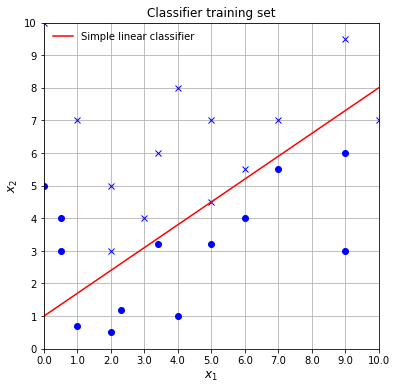

In [25]:
x = np.asarray([[2,5],[3,4],[10,7],[1,7],[3.4,6.0],[7,7],[0,10],
                [6,5.5],[9,9.5],[5,7],[4,8],[2,3],[5,4.5],[1,.7],
                [0.5,3],[5,3.2],[0.5,4],[3.4,3.2],[2.3,1.2],[7,5.5],
                [6,4],[9,6],[4,1],[2,0.5],[0,5],[9,3]])
y = np.asarray([*13*[1],*13*[-1]]).reshape(-1,1)
training_data = zip(x,y)
print(*training_data)
p = ryplot.Plotter(1,1,1,figsize=(6,6),doWarning=False)
for (x1,x2),y in zip(x,y):
    marker = 'o' if y==-1 else 'x'
    p.plot(1,x1,x2,'Classifier training set','$x_1$','$x_2$',linestyle='',markers=[marker],plotCol=['b'],pltaxis=[0,10,0,10])
x1 = np.linspace(0,10,100)
p.plot(1,x1,x1*7/10+1,label=['Simple linear classifier'],plotCol=['r'])
p.saveFig('../pic/chC-trainingset.pdf')

In [34]:
# the list defines the number of nodes in layers 0, 1, 2.
net = network.Network(sizes=[2, 5, 1],nlfn=network.tansig,nlfnpr=network.tansig_prime,silent=True)

#stochastic gradient descent to learn from the  data
net.SGD(training_data, epochs=100, mini_batch_size=10, eta=3.0)



In [36]:
print(net.biases)
print(net.weights)
print(net.weights[0][0][0])


[array([[ 0.74392182],
       [-0.05574792],
       [ 0.23073143],
       [ 0.53839889],
       [-1.14933971]]), array([[-1.26466964]])]
[array([[-0.16892615, -0.30599637],
       [ 0.16578589,  1.33530215],
       [ 1.56064302, -0.78214931],
       [-2.0701771 , -0.2481976 ],
       [-0.12043699, -0.3767845 ]]), array([[-1.05024321, -1.11541313,  0.66953596,  1.92929382, -0.44660539]])]
-0.16892614631970104


`net.biases[0]` are the bias values for the hidden neurons.  
`net.biases[0][n]` is the bias value for the hidden neuron n.  
`net.biases[1]` is the bias value for the output neuron.  

`net.weights[0]` are the weight values for the hidden neurons.  
`net.weights[0][n]` are the weight values for the hidden neuron n.  
`net.weights[0][n][0]` is the weight value between input x1 and the hidden neuron n.  
`net.weights[0][n][1]` is the weight value between input x2 and the hidden neuron n.  



## tansig 

In [ ]:
x = np.linspace(-3,3,200)
p = ryplot.Plotter(1,1,1,figsize=(12,5))
p.plot(1,x,tansig(x),'tansig function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-3,3,-1,1]);

In [ ]:
p = ryplot.Plotter(1,1,1,figsize=(12,5))
p.plot(1,x,tansig_prime(x),'d(tansig) function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-3,3,-1,1]);
p.plot(1,x,np.gradient(tansig(x),x),'d(tansig) function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-3,3,0,1]);
